In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [5]:
data.keys()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
data['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
corr=data.corr()

corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [13]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
data.drop('Surname',axis=1,inplace=True)

In [16]:
data.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

In [17]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [20]:
cat_col=data.select_dtypes(include='object')
cat_col

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [28]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data['Geography']=le.fit_transform(data['Geography'])
data['Gender']=le.fit_transform(data['Gender'])

In [40]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [41]:
data.shape

(10000, 11)

In [30]:
x=data.drop('Exited',axis=1).values
y=data['Exited'].values

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7500, 10), (2500, 10), (7500,), (2500,))

In [33]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()

x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [34]:
import tensorflow as tf
from tensorflow import keras

In [55]:
model=keras.Sequential([
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [56]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [66]:
acc=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)
acc

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2909 - accuracy: 0.8815 - val_loss: 0.3704 - val_accuracy: 0.8496
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2924 - accuracy: 0.8795 - val_loss: 0.3678 - val_accuracy: 0.8504
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2914 - accuracy: 0.8795 - val_loss: 0.3679 - val_accuracy: 0.8464
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2925 - accuracy: 0.8775 - val_loss: 0.3691 - val_accuracy: 0.8492
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2918 - accuracy: 0.8780 - val_loss: 0.3682 - val_accuracy: 0.8528
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2914 - accuracy: 0.8799 - val_loss: 0.3713 - val_accuracy: 0.8472
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2914 - accuracy: 0.8801 - val_loss: 0.3708 - val_accuracy: 0.8480

Epoch 58/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2867 - accuracy: 0.8789 - val_loss: 0.3760 - val_accuracy: 0.8460
Epoch 59/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2884 - accuracy: 0.8789 - val_loss: 0.3775 - val_accuracy: 0.8464
Epoch 60/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2865 - accuracy: 0.8796 - val_loss: 0.3761 - val_accuracy: 0.8460
Epoch 61/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2861 - accuracy: 0.8805 - val_loss: 0.3757 - val_accuracy: 0.8496
Epoch 62/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2864 - accuracy: 0.8816 - val_loss: 0.3756 - val_accuracy: 0.8448
Epoch 63/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2867 - accuracy: 0.8796 - val_loss: 0.3778 - val_accuracy: 0.8468
Epoch 64/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2852 - accuracy: 0.8812 - val_loss: 0.3750 - val_accuracy:

In [67]:
model.evaluate(x_train,y_train)

235/235 [==============================] - 1s 3ms/step - loss: 0.2797 - accuracy: 0.8819


[0.2796923518180847, 0.8818666934967041]

In [68]:
model.evaluate(x_test,y_test)

79/79 [==============================] - 0s 3ms/step - loss: 0.3819 - accuracy: 0.8476


[0.38194739818573, 0.847599983215332]

In [69]:
y_pred=model.predict(x_test)

79/79 [==============================] - 0s 3ms/step


In [70]:
y_pred

array([[0.31364223],
       [0.14909264],
       [0.01873546],
       ...,
       [0.2694748 ],
       [0.03982325],
       [0.03514661]], dtype=float32)

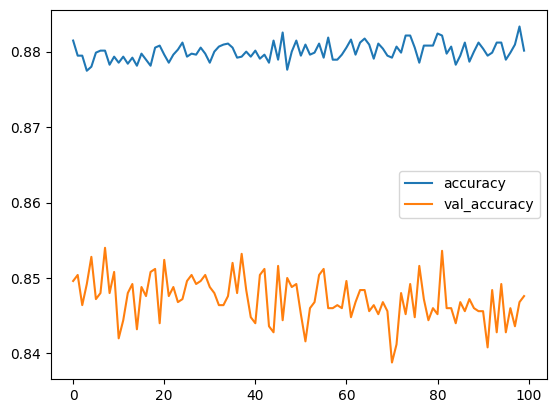

In [71]:
plt.plot(acc.history['accuracy'],label='accuracy')
plt.plot(acc.history['val_accuracy'],label='val_accuracy')
plt.legend()

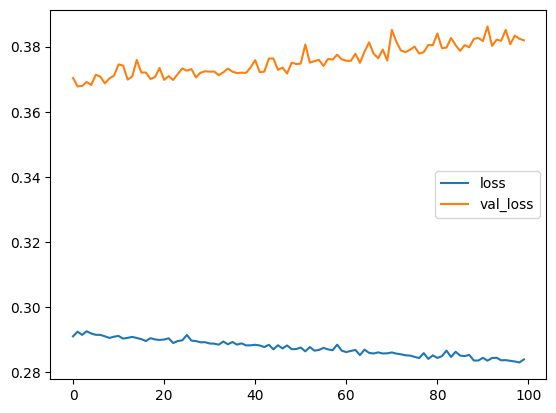

In [73]:
plt.plot(acc.history['loss'],label='loss')
plt.plot(acc.history['val_loss'],label='val_loss')
plt.legend()